In [1]:
# import required modules

import matplotlib.pyplot as plt
import numpy as np
import pprint, os

# to get "physion" see: https://github.com/yzerlaut/physion
from physion.analysis.read_NWB import Data
from physion.analysis.process_NWB import EpisodeResponse
from physion.dataviz.show_data import MultimodalData
from physion.assembling.saving import get_files_with_extension

# to get "datavyz" see: https://github.com/yzerlaut/datavyz
from datavyz import graph_env_manuscript as ge

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

# Dataset

In [2]:
# 
root_datafolder = os.path.join(os.path.expanduser('~'), 'Desktop')

FILES = np.sort(get_files_with_extension(root_datafolder, '.nwb', recursive=True))

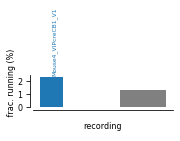

In [3]:
from physion.analysis.behavior import population_analysis
fig, ax = ge.figure(figsize=(1.5,.7), right=5, top=15)
_, ax = population_analysis(FILES, ax=ax)
ge.save_on_desktop(fig, 'fig.png')

# Visualizing raw data

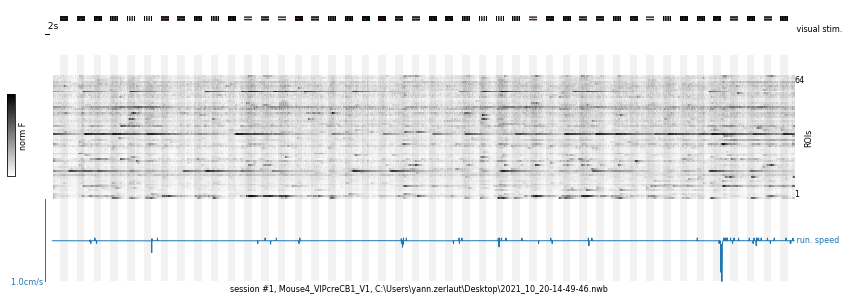

In [5]:
index =0
np.random.seed(10)
data = MultimodalData(FILES[index])
fig, ax = data.plot_raw_data(tlim=[10, 410], 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=1, color=ge.blue),
                            'CaImagingRaster':dict(fig_fraction=3, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   quantity='CaImaging', subquantity='Fluorescence'),
                            #'CaImaging':dict(fig_fraction=4, subsampling=1,
                            #                       roiIndices=np.sort(np.random.choice(np.arange(data.iscell.sum()),5, 
                            #                                                   replace=False)),
                            #                       quantity='CaImaging', subquantity='Fluorescence'),
                           'VisualStim':dict(fig_fraction=1)},
                   Tbar=2, figsize=(3.5,6));
ge.annotate(ax, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,0), ha='center')
# ge.save_on_desktop(fig, 'fig.png', dpi=300)

# Visually-evoked activity - contrast dependency

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

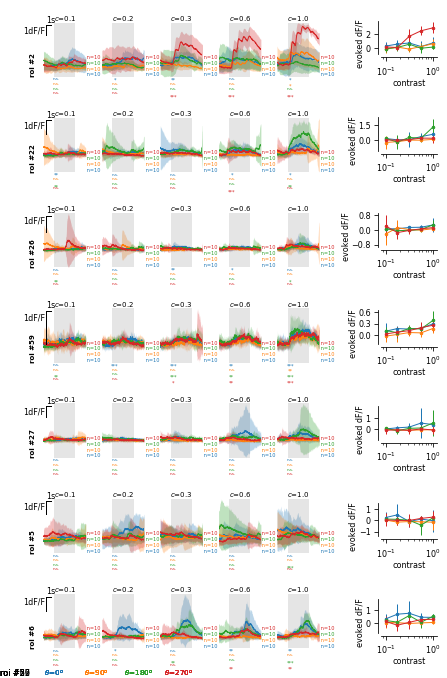

In [6]:
index = 0
FullData = MultimodalData(FILES[index])


CaImaging_options = dict(quantity='CaImaging', subquantity='dF/F')

Nexample = 7
fig, AX = ge.figure(axes=(5,Nexample), figsize=(.8,1.2), right=13, 
                    bottom=0.3, top=1.5,
                    reshape_axes=False, wspace=0.6, hspace=1.2)

stat_test_props=dict(interval_pre=[-2,0], interval_post=[1,3],
                     test='ttest', positive=True)

for n, roiIndex in enumerate(np.random.choice(np.arange(data.iscell.sum()), Nexample, replace=False)):

    EPISODES = EpisodeResponse(FullData,
                               protocol_id=0,
                               prestim_duration=-stat_test_props['interval_pre'][0],
                               roiIndex = roiIndex, verbose=False,
                              **CaImaging_options)

    FullData.plot_trial_average(EPISODES=EPISODES,
                                          protocol_id=0,
                                          roiIndex = roiIndex,
                                          color_key='angle',
                                          column_key='contrast',
                                          ybar=1., ybarlabel='1dF/F',
                                          xbar=1., xbarlabel='1s',
                                          fig=fig, AX=[AX[n]], no_set=False,
                                          with_annotation=True,
                                          with_stat_test=True, stat_test_props=stat_test_props,
                                          verbose=False,
                                          **CaImaging_options)

    cell_data = EPISODES.compute_summary_data(stat_test_props,
                                              exclude_keys=['repeats'])
    print(cell_data['significant'])
    
    inset = ge.inset(fig, (.87,1.-(n+.7)/Nexample,0.13,.35/Nexample))
    
    for a, angle in enumerate(EPISODES.varied_parameters['angle']):
        
        angle_cond = cell_data['angle']==angle
        mResp, sResp = [], []
        
        for c, contrast in enumerate(EPISODES.varied_parameters['contrast']):
            
            cond = angle_cond & (cell_data['contrast']==contrast)
            mResp.append(np.mean(cell_data['value'][cond]))
            sResp.append(np.std(cell_data['value'][cond]))
            
        ge.scatter(EPISODES.varied_parameters['contrast'], mResp, sy=sResp, color=ge.tab10(a), 
                   lw=1, ax=inset, no_set=True)
        
    ge.annotate(AX[n][0], 'roi #%i\n' % (roiIndex+1), (0,0), ha='right', rotation=90, size='small', bold=True)
    
    ge.set_plot(inset, xlabel='contrast', xscale='log', ylabel='evoked dF/F     ')
    
ge.save_on_desktop(fig, 'fig.png', dpi=300)

0
0
0


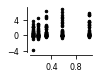

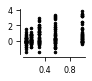

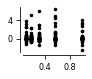

In [7]:
for roiIndex in np.arange(FullData.iscell.sum())[:3]:

    EPISODES = EpisodeResponse(FullData,
                               protocol_id=0,
                               prestim_duration=-stat_test_props['interval_pre'][0],
                               roiIndex = roiIndex, verbose=False,
                              **CaImaging_options)
    
    cell_data = EPISODES.compute_summary_data(stat_test_props,
                                              exclude_keys=['repeats'],
                                              response_significance_threshold=0.5)
    
    ge.scatter(cell_data['contrast'], cell_data['value'])
    print(np.sum(cell_data['significant']))

In [29]:
angle = cell_data['angle'][cell_data['significant']][np.argmax(cell_data['value'][cell_data['significant']])]
print(angle)

ValueError: attempt to get argmax of an empty sequence

In [33]:
cell_data

{'value': array([-4.81137815e-02,  3.42886096e-01,  1.70019074e-01,  1.58444878e-02,
        -2.16234582e-02, -8.37609860e-02,  6.74287342e-01, -1.95739554e-01,
         1.08266747e-01,  1.67277068e-01,  1.19271364e-01,  3.91364509e-02,
         2.03785185e-01,  1.41010028e-01,  2.56865559e-01,  2.12147376e-01,
         1.36384291e-01,  1.66035574e-01,  1.81223214e-01,  1.63993630e-01,
         2.40105734e-01,  1.62396199e-01,  1.59078760e-01,  3.41299149e-01,
         2.99578727e-01,  9.15296143e-02,  1.21311579e-01,  2.59035968e-01,
         3.13399723e-01,  2.61622800e-01,  3.54396262e-01,  1.42121673e-01,
         3.46496553e-01,  2.63071885e-01,  1.28340755e-01,  1.26454758e-01,
         9.94262510e-02,  4.43066292e-01,  5.43440033e-01,  4.26243954e-01,
         7.68575356e-02,  4.07439113e-01,  3.77307677e-01,  3.55474371e-01,
         2.63369053e-01,  1.01162858e+00,  2.85562659e-01,  4.51675159e-02,
        -1.26917358e-01,  4.91294689e-01, -2.96823531e-03,  6.07842998e-02,
   